In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import numpy as np
import itertools
from collections import Counter
import seaborn as sns
import random
import geopandas
import pycountry

In [2]:
# Read data
public_df = pd.read_csv("dataset/survey_results_public.csv")
schema_df = pd.read_csv("dataset/survey_results_schema.csv")

In [3]:
public_df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
schema_df.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [5]:
# Missing value checking
# Top 10 columns with missing value
missing_cols = public_df.isnull().mean()
missing_cols.sort_values(ascending=False).head(10)

ExCoder10Years         0.982157
ExCoderNotForMe        0.982079
ExCoderWillNotCode     0.982059
ExCoderBalance         0.982040
ExCoderReturn          0.982040
ExCoderBelonged        0.981943
ExCoderActive          0.981904
ExCoderSkills          0.981807
YearsCodedJobPast      0.981048
MobileDeveloperType    0.969781
dtype: float64

In [6]:
# How many columns in our dataset?
cols = public_df.columns
len(cols), cols.to_list()

(154,
 ['Respondent',
  'Professional',
  'ProgramHobby',
  'Country',
  'University',
  'EmploymentStatus',
  'FormalEducation',
  'MajorUndergrad',
  'HomeRemote',
  'CompanySize',
  'CompanyType',
  'YearsProgram',
  'YearsCodedJob',
  'YearsCodedJobPast',
  'DeveloperType',
  'WebDeveloperType',
  'MobileDeveloperType',
  'NonDeveloperType',
  'CareerSatisfaction',
  'JobSatisfaction',
  'ExCoderReturn',
  'ExCoderNotForMe',
  'ExCoderBalance',
  'ExCoder10Years',
  'ExCoderBelonged',
  'ExCoderSkills',
  'ExCoderWillNotCode',
  'ExCoderActive',
  'PronounceGIF',
  'ProblemSolving',
  'BuildingThings',
  'LearningNewTech',
  'BoringDetails',
  'JobSecurity',
  'DiversityImportant',
  'AnnoyingUI',
  'FriendsDevelopers',
  'RightWrongWay',
  'UnderstandComputers',
  'SeriousWork',
  'InvestTimeTools',
  'WorkPayCare',
  'KinshipDevelopers',
  'ChallengeMyself',
  'CompetePeers',
  'ChangeWorld',
  'JobSeekingStatus',
  'HoursPerWeek',
  'LastNewJob',
  'AssessJobIndustry',
  'Assess

In [7]:
# How many columns with more than 70% missing data?
cols[missing_cols > 0.7]

Index(['YearsCodedJobPast', 'WebDeveloperType', 'MobileDeveloperType',
       'NonDeveloperType', 'ExCoderReturn', 'ExCoderNotForMe',
       'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills',
       'ExCoderWillNotCode', 'ExCoderActive', 'Overpaid', 'TimeAfterBootcamp',
       'Salary', 'ExpectedSalary'],
      dtype='object')

In [8]:
# How many country in the dataset?
countries = public_df["Country"].unique()
public_df["Country"].nunique()

201

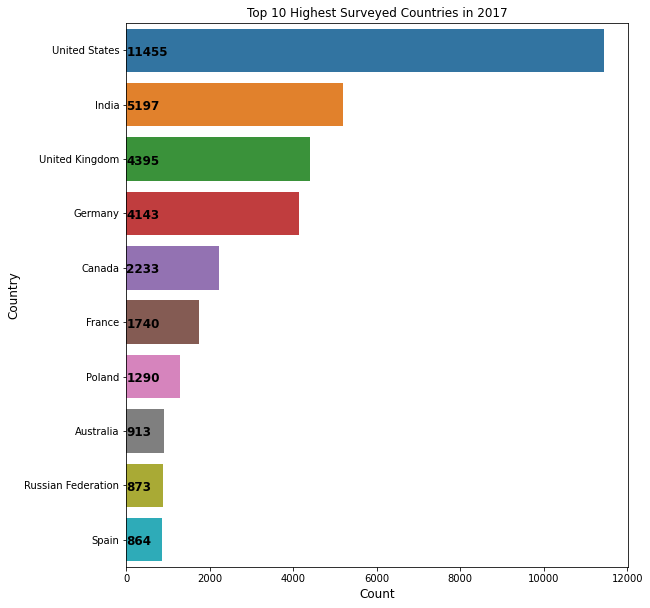

In [9]:
# Top 10 highest surveyed country
surveyed_df = public_df["Country"].value_counts().sort_values(ascending=False).reset_index(name="Count")
surveyed_df.columns = ["Country", "Count"]
visual_surveyed_df = surveyed_df.head(10)

plt.figure(figsize=(9, 10))
ax = sns.barplot(x="Count", y="Country",
                 data=visual_surveyed_df, linewidth=1)
for i, j in enumerate(visual_surveyed_df["Count"]):
    ax.text(0, i + 0.1, j, weight="bold", color="black", fontsize=12)
plt.title("Top 10 Highest Surveyed Countries in 2017")
ax.set_xlabel(xlabel='Count', fontsize=12)
ax.set_ylabel(ylabel='Country', fontsize=12)
plt.show()

In [10]:
programming_lang_df = public_df.dropna(subset=["HaveWorkedLanguage"])
programming_lang_df["HaveWorkedLanguage"] = programming_lang_df["HaveWorkedLanguage"].apply(lambda x: str(x).split("; "))

/Users/hoanghung/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [11]:
# Top popular programming languages
programming_lang_dict = sorted(dict(Counter(list(itertools.chain(*programming_lang_df["HaveWorkedLanguage"].values)))).items(), key=lambda x: x[1], reverse=True)

pgl_rank_df = pd.DataFrame(programming_lang_dict, columns=["Programming Language", "Count"])
pgl_rank_df.head()
# programming_lang_dict


,Programming Language,Count
0,JavaScript,22875
1,SQL,18754
2,Java,14524
3,C#,12476
4,Python,11704


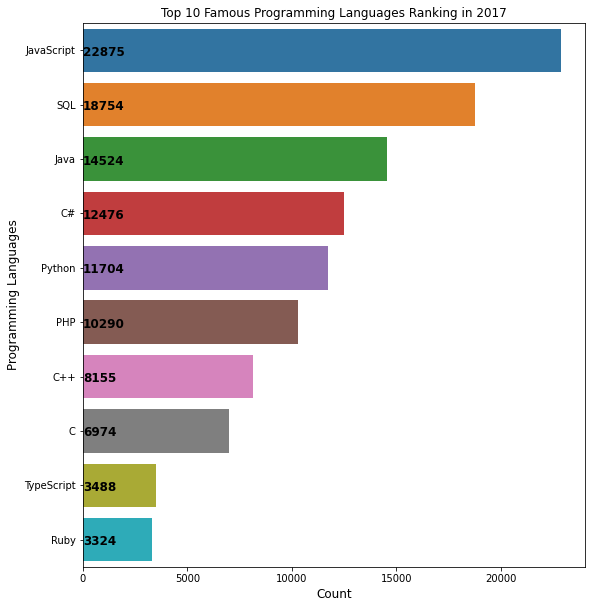

In [12]:
plt.figure(figsize=(9, 10))
tmp = pgl_rank_df.head(10)
ax = sns.barplot(x="Count", y="Programming Language",
                 data=tmp, linewidth=1)
for i, j in enumerate(tmp["Count"]):
    ax.text(0, i + 0.1, j, weight="bold", color="black", fontsize=12)
plt.title("Top 10 Famous Programming Languages Ranking in 2017")
ax.set_xlabel(xlabel='Count', fontsize=12)
ax.set_ylabel(ylabel='Programming Languages', fontsize=12)
plt.show()

In [13]:
# Top 1 programming language in each country

def extract_lang(x):
    sorted_pl = sorted(dict(Counter(list(itertools.chain(*x)))).items(), key=lambda x: x[1])
    return pd.DataFrame([{"Programming Language": sorted_pl[-1][0], "Count": sorted_pl[-1][1], "All Programming Languages": sorted_pl}])
    
most_popular_pg_lan_df = programming_lang_df.groupby("Country")["HaveWorkedLanguage"].apply(extract_lang).sort_values(by="Count", ascending=False).reset_index()
most_popular_pg_lan_df.head(10)

,Country,level_1,Programming Language,Count,All Programming Languages
0,United States,0,JavaScript,5699,"[(Hack, 27), (Dart, 39), (Julia, 42), (Erlang,..."
1,United Kingdom,0,JavaScript,2214,"[(Dart, 9), (Julia, 11), (Hack, 13), (Smalltal..."
2,Germany,0,JavaScript,1770,"[(Hack, 5), (Julia, 13), (Dart, 13), (Erlang, ..."
3,India,0,JavaScript,1580,"[(Dart, 6), (Hack, 6), (F#, 7), (Rust, 8), (Ju..."
4,Canada,0,JavaScript,1104,"[(Hack, 3), (Julia, 5), (Common Lisp, 9), (Dar..."
5,France,0,JavaScript,807,"[(Julia, 3), (Hack, 6), (Dart, 7), (Clojure, 1..."
6,Poland,0,JavaScript,563,"[(Hack, 1), (Smalltalk, 2), (Dart, 3), (Julia,..."
7,Australia,0,JavaScript,476,"[(Erlang, 1), (Hack, 2), (Julia, 4), (Common L..."
8,Netherlands,0,JavaScript,416,"[(Julia, 1), (Hack, 2), (Dart, 2), (Erlang, 5)..."
9,Spain,0,JavaScript,390,"[(Dart, 2), (Smalltalk, 2), (Elixir, 2), (Juli..."


In [14]:
countries_dict = dict([('Iran', 'IRN'),
 ('Czech Republic', 'CZE'),
 ('I prefer not to say', None),
 ('Moldavia', 'MDA'),
 ('Slovak Republic', 'SVK'),
 ('South Korea', 'KOR'),
 ('Bolivia', 'BOL'),
 ('Vietnam', 'VNM'),
 ('Macedonia', 'MKD'),
 ('Bosnia-Herzegovina', 'BIH'),
 ('Netherlands Antilles', 'ANT'),
 ('Virgin Islands (USA)', 'VIR'),
 ('Taiwan', 'TWN'),
 ('Cape Verde', 'CPV'),
 ('North Korea', 'PRK'),
 ('Aland Islands', 'FIN'),
 ('Azerbaidjan', 'AZE'),
 ('Venezuela', 'VEN'),
 ('S. Georgia & S. Sandwich Isls.', 'SGS'),
 ('Syria', 'SYR'),
 ('Virgin Islands (British)', 'VGB'),
 ('Tanzania', 'TZA'),
 ('Reunion (French)', 'FRA'),
 ('Vatican City State', 'VAT'),
 ('New Caledonia (French)', 'FRA'),
 ('Laos', 'LAO'),
 ('Tadjikistan', 'TJK'),
 ('Zaire', 'COG'),
 ("Ivory Coast (Cote D'Ivoire)", 'CIV'),
 ('U.S. Minor Outlying Islands', 'UMI'),
 ('Polynesia (French)', 'PYF'),
 ('French Guyana', 'GUY'),
 ('Pitcairn Island', 'PCN'),
 ('Swaziland', 'SWZ'),
 ('Saint Vincent & Grenadines', 'VCT'),
 ('Martinique (French)', 'MTQ'),
 ('Macau', 'MAC'),
 ('Falkland Islands', 'FLK'),
 ('Heard and McDonald Islands', 'HMD'),
 ('Saint Helena', 'SHN')])
for c in pycountry.countries:
    countries_dict[c.name] = c.alpha_3
    if c.__dict__.get("official_name") is None or c.official_name == c.name:
        continue
    countries_dict[c.official_name] = c.alpha_3

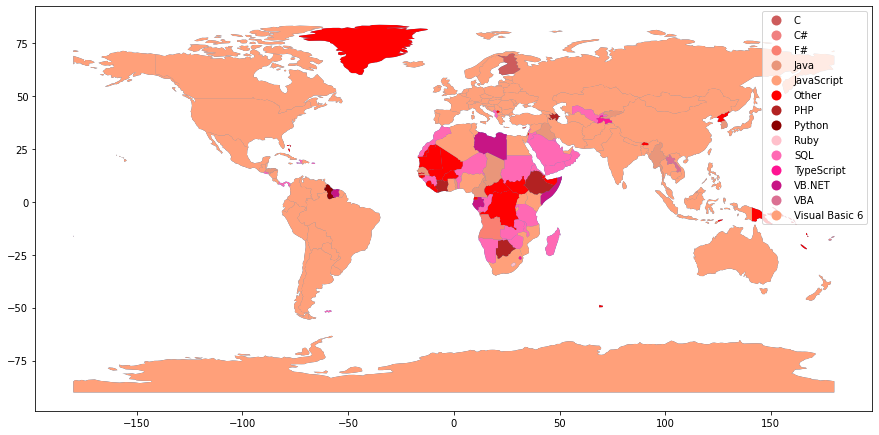

In [15]:
most_popular_pg_lan_df["alpha_3"] = most_popular_pg_lan_df.Country.map(countries_dict)
code_pg_dict = dict(zip(most_popular_pg_lan_df.alpha_3.values, most_popular_pg_lan_df["Programming Language"].values))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15, 15))
world["pg"] = world.iso_a3.map(code_pg_dict)
world["pg"].fillna("Other", inplace=True)

color_dict = dict(zip(list(most_popular_pg_lan_df["Programming Language"].unique()), 
                      ["#CD5C5C", "#F08080", "#FA8072", "#E9967A", "#FFA07A", "#DC143C", "#FF0000", "#B22222", "#8B0000", "#FFC0CB", "#FFB6C1", "#FF69B4", "#FF1493", "#C71585", "#DB7093", "#FFA07A"]))

world.plot(ax=ax, column="pg", legend=True, cmap=mc.ListedColormap(list(color_dict.values())))
plt.show()

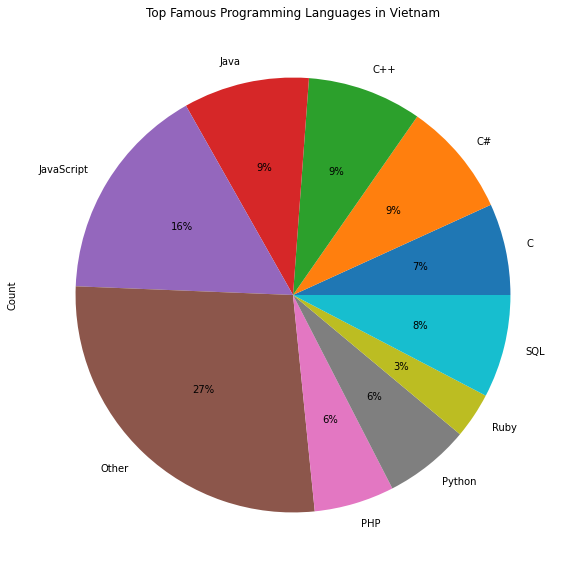

In [16]:
vietnam_df = pd.DataFrame(most_popular_pg_lan_df[most_popular_pg_lan_df["Country"] == "Vietnam"]["All Programming Languages"].values[0], columns=["Programming Language", "Count"]).sort_values(by="Count", ascending=False)

vietnam_df["Programming Language"] = vietnam_df.apply(lambda x: x["Programming Language"] if x["Count"] > 6 else "Other", axis=1)

plt.figure(figsize=(10, 10))
vietnam_df.groupby("Programming Language")["Count"].sum().plot(
    kind='pie', y='Count', autopct='%1.0f%%', title='Top Famous Programming Languages in Vietnam')
plt.show()

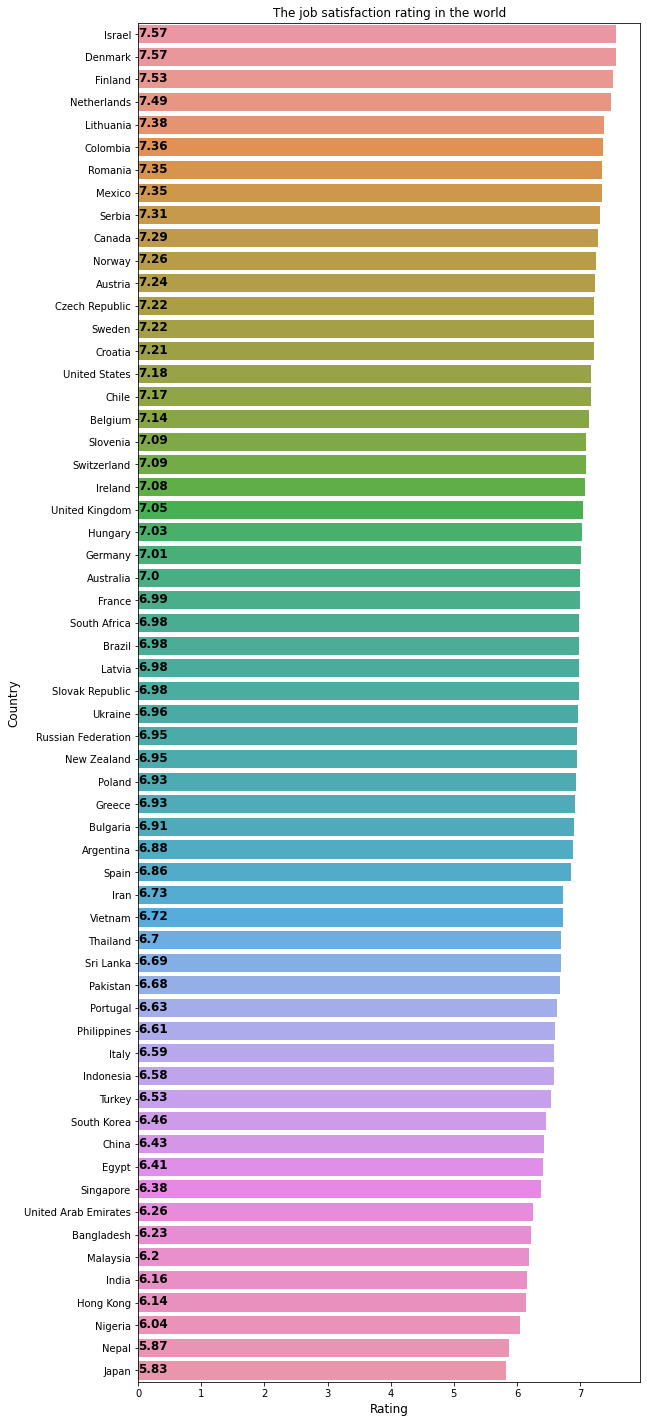

In [17]:
# Job satisfaction of developers at top 60 surveyed countries in 2017
# How much do developers satisfied with their jobs in the countries?
countries_60_list = list(surveyed_df.head(61)["Country"].values)
countries_60_list.remove("I prefer not to say")
countries_60_list = countries_60_list[:60]
satisfy_surveyed_df = public_df[public_df.Country.isin(countries_60_list)].dropna(subset=["JobSatisfaction"])


plt.figure(figsize=(9, 25))
tmp = satisfy_surveyed_df.groupby("Country")["JobSatisfaction"].mean().sort_values(ascending=False).reset_index()
ax = sns.barplot(x="JobSatisfaction", y="Country",
                 data=tmp, linewidth=1)
for i, j in enumerate(tmp["JobSatisfaction"]):
    ax.text(0, i + 0.1, round(j, 2), weight="bold", color="black", fontsize=12)
plt.title("The job satisfaction rating in the world")
ax.set_xlabel(xlabel='Rating', fontsize=12)
ax.set_ylabel(ylabel='Country', fontsize=12)
plt.show()

In [18]:
# 7.57 –  the job satisfaction rating in Israel and Denmark, also the highest in the world.
# Finland follows with a 7.53 job satisfaction rating.
# Vietnam rows at No 40 in the list.
# Japan locates at the bottom with 5.83

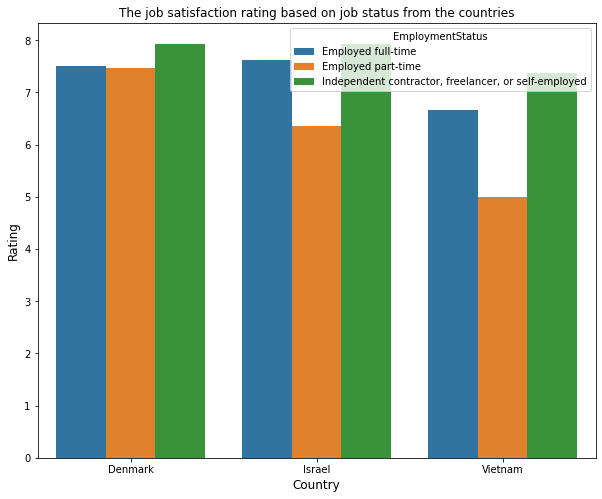

In [19]:
vn_satisfy_surveyed_df = satisfy_surveyed_df[satisfy_surveyed_df["Country"].isin(["Israel", "Denmark", "Vietnam"])]

plt.figure(figsize=(10, 8))
tmp = vn_satisfy_surveyed_df.groupby(["Country", "EmploymentStatus"])["JobSatisfaction"].mean().reset_index()
ax = sns.barplot(x="Country", y="JobSatisfaction", hue="EmploymentStatus",
                 data=tmp, linewidth=1)

plt.title("The job satisfaction rating based on job status from the countries")
ax.set_xlabel(xlabel='Country', fontsize=12)
ax.set_ylabel(ylabel='Rating', fontsize=12)
plt.show()